# Sentiment analysis

For this excercise, we will use corpus data.

### Importing key modules

In [0]:
from textblob import TextBlob
import pandas as pd

In [2]:
data = pd.read_pickle('corpus.pkl')
data

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name
name,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",7357,38992,4.288234,2762,0,10,309,Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",6713,34526,4.135863,2299,0,6,317,Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",12218,64607,4.287936,4323,1,32,415,Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,7148,38509,4.387521,2192,1,9,264,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,9145,48109,4.244626,3118,0,9,410,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,10497,56130,4.341043,3267,5,12,486,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,11094,58688,4.288302,3898,0,10,406,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,9959,53750,4.395743,3471,0,9,207,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney


In [3]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name,polarity,subjectivity
name,,,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",7357,38992,4.288234,2762,0,10,309,Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",6713,34526,4.135863,2299,0,6,317,Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",12218,64607,4.287936,4323,1,32,415,Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,7148,38509,4.387521,2192,1,9,264,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,9145,48109,4.244626,3118,0,9,410,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,10497,56130,4.341043,3267,5,12,486,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,11094,58688,4.288302,3898,0,10,406,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,9959,53750,4.395743,3471,0,9,207,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney,0.082355,0.484137


### Visualization

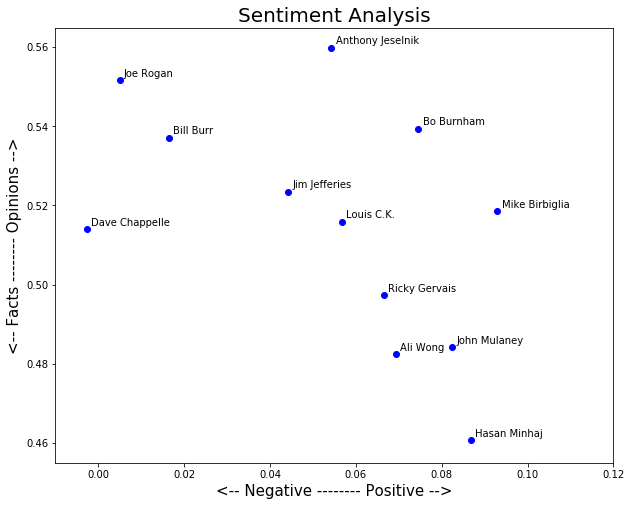

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Sentiment of Routine Over Time

In [0]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
data

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name,polarity,subjectivity
name,,,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",7357,38992,4.288234,2762,0,10,309,Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",6713,34526,4.135863,2299,0,6,317,Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",12218,64607,4.287936,4323,1,32,415,Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,7148,38509,4.387521,2192,1,9,264,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,9145,48109,4.244626,3118,0,9,410,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,10497,56130,4.341043,3267,5,12,486,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,11094,58688,4.288302,3898,0,10,406,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,9959,53750,4.395743,3471,0,9,207,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney,0.082355,0.484137


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\r\r\nAnd then, when they go to sleep, they just 

In [8]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09469668577307465,
  -0.014671592775041055,
  0.09199378297961454,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.05070608684245053,
  0.07360080395794678],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [0.17481829573934843,
  -0.04116923483102918,
  -0.022686011904761886,
  0.019912549136687042,
  0.0592493946731235,
  0.05700242218099361,
  0.04407051282051284,
  0.11019892033865757,
  0.19319944575626394,
  0.23029900332225917],
 [-0.05093449586407334,
  -0.05557354333778966,
  0.0358

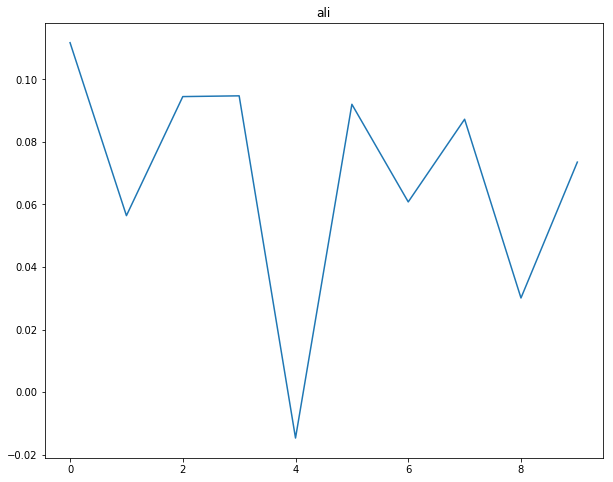

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


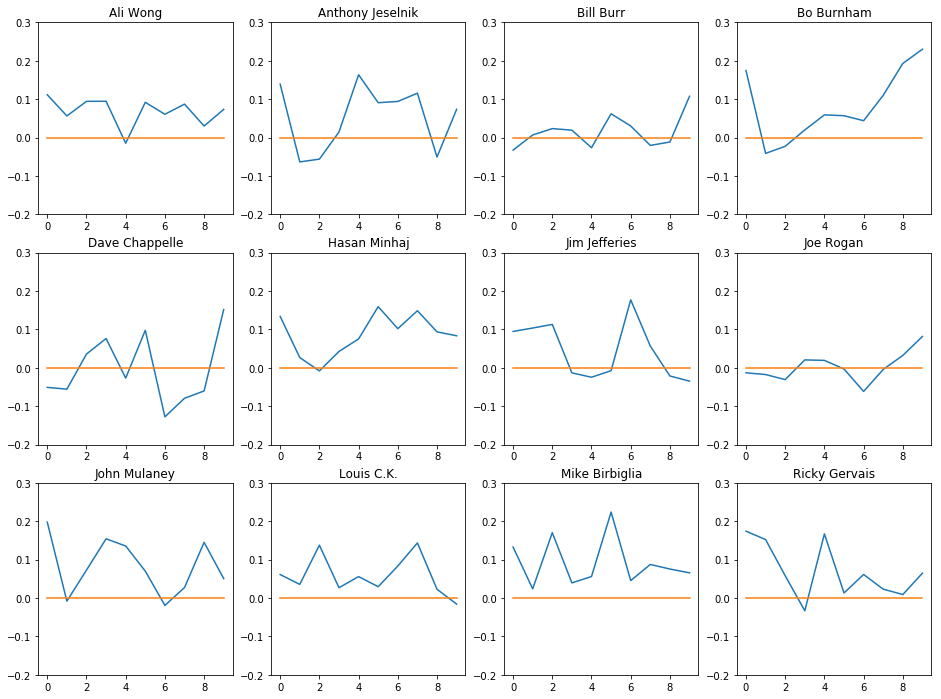

In [12]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### using more splits for given data

In [0]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [15]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\r\r\nAnd then, when they go to sleep, they just 

In [16]:
len(list_pieces)

12

In [17]:
len(list_pieces[0])

20

In [18]:
len(list_pieces[1])

20

In [19]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.18230030721966203,
  0.0335034013605442,
  0.09856398809523811,
  0.02090643274853801,
  0.11037581699346405,
  0.07853800611153554,
  0.039282694962042786,
  0.13581029185867893,
  0.016666666666666663,
  -0.03669387755102041,
  0.03431517611779561,
  0.1858715503246753,
  0.08565315315315315,
  0.03374793099057805,
  0.0769073220686124,
  0.08333333333333333,
  0.07185773074661965,
  0.0014885265700483271,
  0.024843358395989994,
  0.12490079365079367],
 [0.2678294552669553,
  0.010848214285714293,
  -0.033207792207792214,
  -0.08264652014652014,
  -0.1334353741496599,
  0.031099590373783917,
  0.13125000000000003,
  -0.05312805474095798,
  0.11977124183006535,
  0.2065182436611008,
  0.008928571428571414,
  0.17289819376026275,
  0.178125,
  0.029642857142857137,
  0.08748677248677247,
  0.15242272347535502,
  -0.20135438233264324,
  0.05757237554112554,
  0.01940836940836938,
  0.14585738335738338],
 [0.01614895152129194,
  -0.0847041847041847,
  -0.01004088504088504,
  0.03156

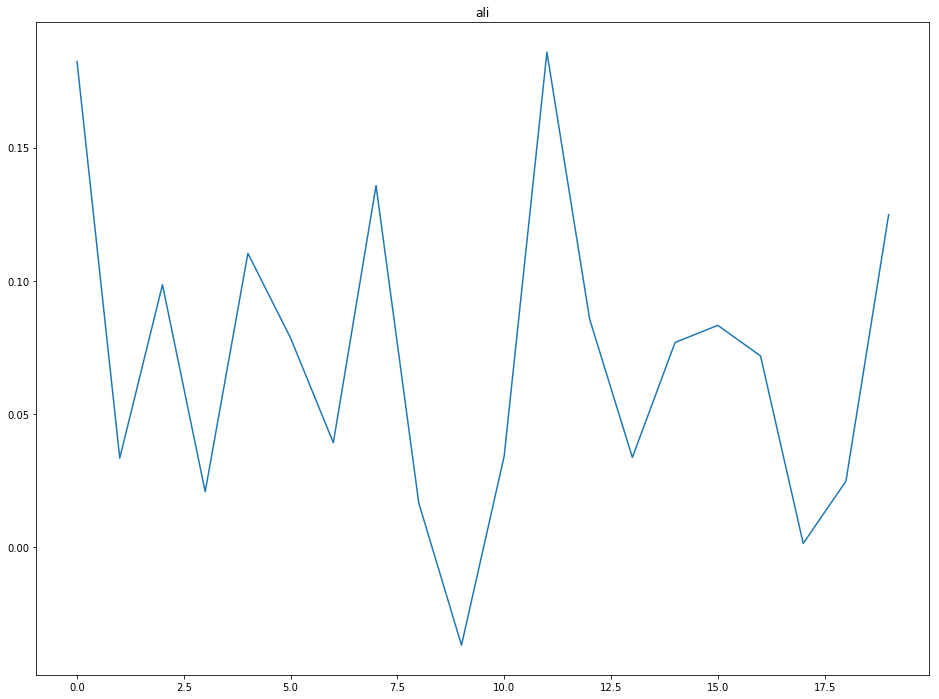

In [20]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

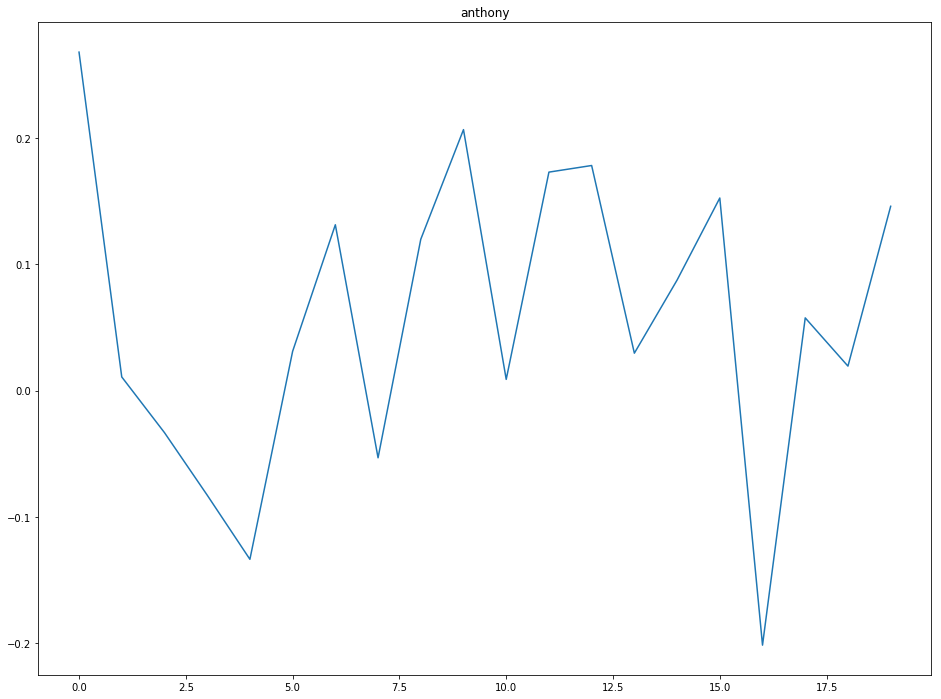

In [21]:
# Show the plot for one comedian
plt.plot(polarity_transcript[1])
plt.title(data['full_name'].index[1])
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


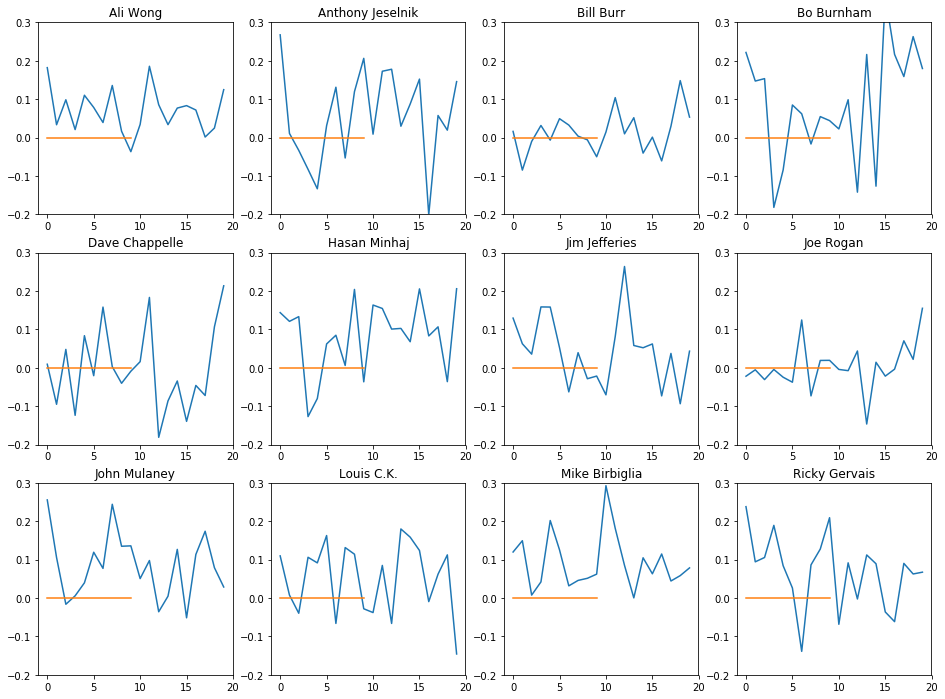

In [22]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()